In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

# Python Unit Lab 2: College Board data set
### Assignment
Use Pandas and other Python libraries to generate and communicate business insights from a data set.

>As a consultant for the College Board — the company that administers the SAT — I was tasked with tracking statewide participation to recommend where to spend money to improve participation rates. I conducted an analysis to recommend how the College Board can increase participation in a state of my choice.

### Deliverables
Submit a Jupyter Notebook containing:
- Imported data, including at least two DataFrames and at least one combination of DataFrames via methods such as joining or concatenation.
- Functions for cleaning the data set, with explanations for how null values are being handled in each field.
- At least two visualizations accompanied by textual descriptions of the business insights they communicate.

### SAT Years 2017-2019
Importing data

In [4]:
sat_2017 = pd.read_csv(r"/Users/fuzzellfamily/Python_GA/python-lab-data-college-board/sat_2017.csv")
sat_2018 = pd.read_csv(r"/Users/fuzzellfamily/Python_GA/python-lab-data-college-board/sat_2018.csv")
sat_2019 = pd.read_csv(r"/Users/fuzzellfamily/Python_GA/python-lab-data-college-board/sat_2019.csv")

---
---

## Recommendations Based on Analysis
### Findings
*Lower participation rates (Tennessee) = higher total scores*
>States with higher participation rates, like Colorado, have a larger pool of test takers, which brings the average total score down. See [Plot the participation rates for Colorado & Tennessee](#plot-participation) and [Compare total scores: Colorado & Tennessee](#plot-scores) below.

### Recommendations to increase participation:
1. All high school students should be required to take the SATs. 
2. Federal funding should pay for the test fees and test prep, removing cost barriers.
3. SAT exams should be offered during the normal school day.

---
---

### How did I arrive at these conclusions and recommendations?
Let's now look at my process for extracting, wrangling, analyzing, and interpreting SAT data for 2017-2019.

In [9]:
sat_2017.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116


In [10]:
sat_2018.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


In [11]:
sat_2019.head(3)

,State,Participation Rate,EBRW,Math,Total
0,Alabama,7%,583,560,1143
1,Alaska,41%,556,541,1097
2,Arizona,31%,569,565,1134


#### For consistency, I already see some things I need to format and clean in this data:
1. I want to add a "Year" column to each data set, which will help me further analyze the data after I've joined these three data sets into one.
2. The column headers need to be consistent. I will change the "Participation" and "Participation Rate" to "Participation %".
3. I will also need to change the 2019 "EBRW" column header to "Evidence-Based Reading and Writing" to be consistent with 2017 and 2018.

In [13]:
# Add a column for the year 
sat_2017["Year"] = "2017"
sat_2018["Year"] = "2018"
sat_2019["Year"] = "2019"

In [14]:
# Rename the "Participation" and "Participation Rate" column headers to "Participation %"
sat_2017.rename(columns = {"Participation" : "Participation %"}, inplace = True)
sat_2018.rename(columns = {"Participation" : "Participation %"}, inplace = True)
sat_2019.rename(columns = {"Participation Rate" : "Participation %"}, inplace = True)

# Rename the "EBRW" column to "Evidence-Based Reading and Writing"
sat_2019.rename(columns = {"EBRW" : "Evidence-Based Reading and Writing"}, inplace = True)

In a deeper data exploration, I found that the SAT 2019 data set includes "–" values for Puerto Rico and Virgin Islands in "Participation %". These need to be cleaned up:
1. Convert "–" values to NaN
2. Drop the null/NaN values

In [16]:
# Replace "–" values with NaN for Puerto Rico and Virgin Islands
sat_2019.replace("—", np.nan, inplace=True)

# Drop the null/NaN values
sat_2019.dropna(subset=["Participation %"], inplace=True)

Since the "Participation %" values are cleaned up, I want to remove "%" from all column values. The values will then be a lot easier to work.

In [18]:
# Remove the % from "Participation %" column values
sat_2017["Participation %"] = sat_2017["Participation %"].str.replace("%", "")
sat_2018["Participation %"] = sat_2018["Participation %"].str.replace("%", "")
sat_2019["Participation %"] = sat_2019["Participation %"].str.replace("%", "")

Let's do a quick check on how the data looks at this point.

In [20]:
sat_2017.head(3)

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
0,Alabama,5,593,572,1165,2017
1,Alaska,38,547,533,1080,2017
2,Arizona,30,563,553,1116,2017


In [21]:
sat_2018.head(3)

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
0,Alabama,6,595,571,1166,2018
1,Alaska,43,562,544,1106,2018
2,Arizona,29,577,572,1149,2018


In [22]:
sat_2019.head(3)

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
0,Alabama,7,583,560,1143,2019
1,Alaska,41,556,541,1097,2019
2,Arizona,31,569,565,1134,2019


Now I'll convert those "Participation %" column values to integers, which will help with data analysis, including sorting by highest and lowest participation rates.

In [24]:
# Convert "Participation %" column values from string to integer
sat_2017["Participation %"] = sat_2017["Participation %"].apply(int)
sat_2018["Participation %"] = sat_2018["Participation %"].apply(int)
sat_2019["Participation %"] = sat_2019["Participation %"].apply(int)

Further exploratory data analysis was performed on each of the three SAT years to sort by highest participation rate and Math score and lowest participation rate and Math score.

In this analysis, I saw that states with very **high participation rates** had total scores that performed **lower** than states with **low participation rates**.

## Now, I combine the three DataFrames together into a stacked DataFrame
I concatenated the `sat_2017`, `sat_2018`, and `sat_2019` DataFrames to stack them on top of each other. This worked well because I previously had made the columns consistent.

In [26]:
combined_sat_2017_to_2019 = pd.concat([sat_2017, sat_2018, sat_2019])
combined_sat_2017_to_2019

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
0,Alabama,5,593,572,1165,2017
1,Alaska,38,547,533,1080,2017
2,Arizona,30,563,553,1116,2017
3,Arkansas,3,614,594,1208,2017
4,California,53,531,524,1055,2017
...,...,...,...,...,...,...
48,Virginia,68,567,551,1119,2019
49,Washington,70,539,535,1074,2019
50,West Virginia,99,483,460,943,2019
51,Wisconsin,3,635,648,1283,2019


With this combined data, I want to sort by the **lowest 10** participation rates.

In [28]:
# Combined - lowest 10 participation rates
combined_sat_2017_to_2019.sort_values(by=["Participation %"], ascending=False).tail(10)

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
27,Nebraska,3,629,623,1252,2018
24,Mississippi,3,628,608,1237,2019
41,South Dakota,3,622,618,1240,2018
49,Wisconsin,3,641,653,1294,2018
50,Wyoming,3,633,625,1257,2018
34,North Dakota,2,635,621,1256,2017
24,Mississippi,2,634,607,1242,2017
34,North Dakota,2,640,643,1283,2018
15,Iowa,2,641,635,1275,2017
34,North Dakota,2,627,636,1263,2019


I also want to sort by the top 10 participation rates.

In [30]:
# Combined - highest 10 participation rates
combined_sat_2017_to_2019.sort_values(by=["Participation %", "Year"], ascending=False).head(10)

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
5,Colorado,100,518,506,1024,2019
6,Connecticut,100,529,516,1046,2019
7,Delaware,100,499,486,985,2019
9,Florida,100,516,483,999,2019
12,Idaho,100,505,488,993,2019
13,Illinois,100,509,504,1013,2019
22,Michigan,100,507,496,1003,2019
40,Rhode Island,100,503,492,995,2019
5,Colorado,100,519,506,1025,2018
6,Connecticut,100,535,519,1053,2018


Since Colorado appears twice (2018 and 2018) in the top participation rates, I decide to compare my state (Tennessee) to Colorado.

### Tennessee trends: 2017-2019 SAT total scores
Low participation rates, but high total scores

In [32]:
# TN scores 2017-2019
tn_combined_scores = combined_sat_2017_to_2019[combined_sat_2017_to_2019["State"] == "Tennessee"]
tn_combined_scores

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
42,Tennessee,5,623,604,1228,2017
42,Tennessee,6,624,607,1231,2018
43,Tennessee,7,618,602,1220,2019


### Colorado trends: 2017-2019 SAT total scores
High participation rates, but lower total scores

In [34]:
# CO scores 2017-2019
co_combined_scores = combined_sat_2017_to_2019[combined_sat_2017_to_2019["State"] == "Colorado"]
co_combined_scores

,State,Participation %,Evidence-Based Reading and Writing,Math,Total,Year
5,Colorado,11,606,595,1201,2017
5,Colorado,100,519,506,1025,2018
5,Colorado,100,518,506,1024,2019


## <a name="plot-participation"></a>Plot the participation rates for Colorado & Tennessee
This visual is a clear indicator that Tennessee's participation rates trended much lower than Colorado's.

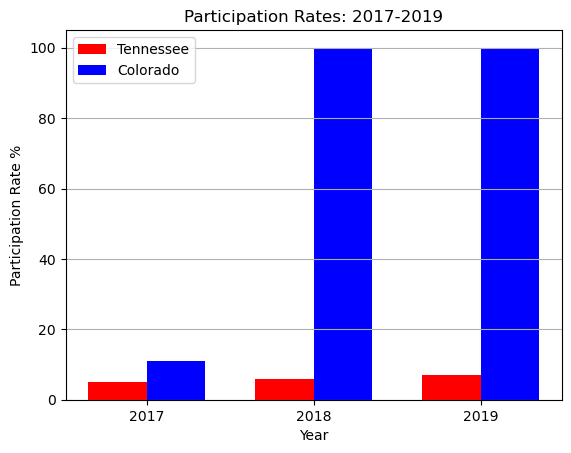

In [36]:
# Define 'years' and 'participation'
tn_years = tn_combined_scores["Year"]
tn_participation = tn_combined_scores["Participation %"]

co_years = co_combined_scores["Year"]
co_participation = co_combined_scores["Participation %"]

# Bar positions and width
width = 0.35
x = np.arange(len(tn_years))

plt.bar(x - width/2, tn_participation, width, color="red", label="Tennessee")
plt.bar(x + width/2, co_participation, width, color="blue", label="Colorado")

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Participation Rate %")
plt.title("Participation Rates: 2017-2019")
plt.xticks(x, tn_years)  # Map the numeric positions to the actual years
plt.legend()  # Add legend
plt.grid(axis="y")

# Show the plot
plt.show()

## <a name="plot-scores"></a>Plot the total scores for Colorado & Tennessee
Another great visual that highlights that Tennessee's scores trended higher than Colorado's.

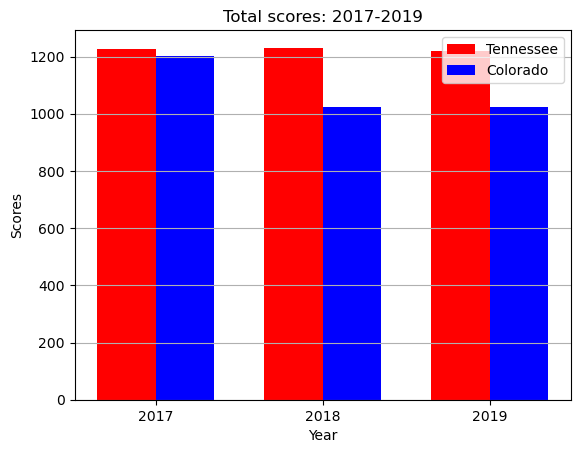

In [38]:
# Define 'years' and 'participation'
tn_years = tn_combined_scores["Year"]
tn_total = tn_combined_scores["Total"]

co_years = co_combined_scores["Year"]
co_total = co_combined_scores["Total"]

# Bar positions and width
width = 0.35
x = np.arange(len(tn_years))

plt.bar(x - width/2, tn_total, width, color="red", label="Tennessee")
plt.bar(x + width/2, co_total, width, color="blue", label="Colorado")

# Add labels, title, and legend
plt.xlabel("Year")
plt.ylabel("Scores")
plt.title("Total scores: 2017-2019")
plt.xticks(x, tn_years)  # Map the numeric positions to the actual years
plt.legend()  # Add legend
plt.grid(axis="y")

# Show the plot
plt.show()

---

## Recommendations Based on Analysis - Revisited
### Findings
As stated at the top of the workbook, the data shows that *lower state participation rates* (like Tennessee) tend to have **higher total scores**.
>States with higher participation rates, like Colorado, have a larger pool of test takers, which brings the average total score down. See **Compare participation: Colorado & Tennessee** and **Compare total scores: Colorado & Tennessee** below.

### To increase participation, I recommend:
1. All high school students should be required to take the SATs. 
2. Federal funding should pay for the test fees and test prep, removing cost barriers.
3. SAT exams should be offered during the normal school day.